In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
e = 1
p_obs = 1

In [3]:
x = np.linspace(-1, 3, 50)

In [4]:
def c(x):
    r = (x-p_obs)
    cost = e - r**2
    cost = 0.5*(r**2 < e)*cost
    return cost, r

In [5]:
def grad_diff(x, inc=0.001):
    grad_cost = np.zeros((len(x)))
    J = np.zeros((len(x)))

    xp = x.copy()
    xp +=inc
    costp, rp = c(xp)

    xm = x.copy()
    xm -= inc
    costm, rm = c(xm)

    diff = (costp-costm)/(2*inc)
    diff_r = (rp-rm)/(2*inc)
    grad_cost = diff
    J = diff_r
    return grad_cost, J

In [6]:
def hess_diff(x, inc=0.001):
    hess_cost = np.zeros(len(x))
    xp = x.copy()
    xp+=inc
    grad_costp, Jp = grad_diff(xp)

    xm = x.copy()
    xm-=inc
    grad_costm, Jm = grad_diff(xm)

    diff = (grad_costp-grad_costm)/(2*inc)
    hess_cost = diff
    return hess_cost

In [7]:
def hess_diff_gauss(x):
    cost, r = c(x)
    _,J = grad_diff(x)
    return J*J*(r**2 < e)

In [8]:
def hess(x):
    jac = grad(x)
    return jac*jac

In [9]:
cost,_ = c(x)
grad_cost,_ = grad_diff(x)
hess_cost = hess_diff(x)
hess_cost_gauss = hess_diff_gauss(x)

#### Plot cost

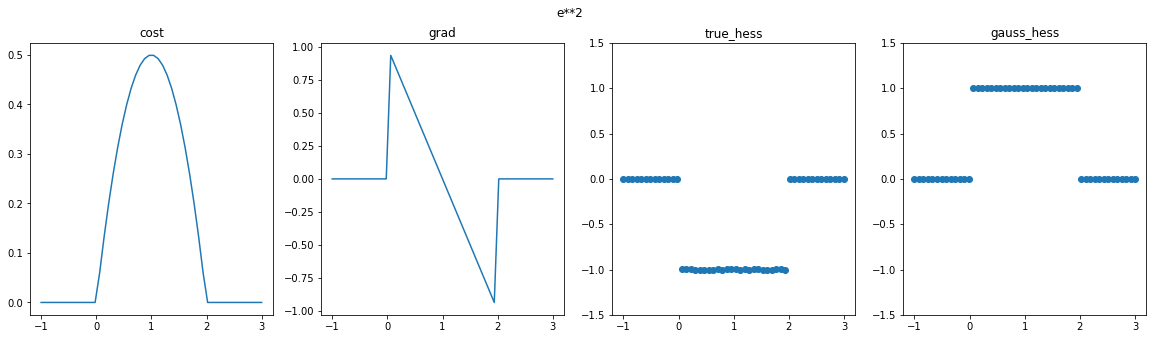

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(10,20))
fig.set_size_inches(20,5)
axs[0].plot(x, cost, label='cost')
axs[0].set_title('cost')
axs[1].plot(x, grad_cost, label='grad')
axs[1].set_title('grad')
axs[2].plot(x, hess_cost, 'o', label='true_hess')
axs[2].set_title('true_hess')
axs[2].set_ylim([-1.5,1.5])
axs[3].plot(x, hess_cost_gauss, 'o', label='gauss_hess')
axs[3].set_title('gauss_hess')
axs[3].set_ylim([-1.5,1.5])
fig.suptitle('e**2')
plt.savefig('e_2.png')
plt.show()

## Optimizing this function

### Gradient descent

### Newton Method

***

# Power of 4

In [63]:
e = 1
p_obs = 1

In [64]:
x = np.linspace(-1, 3, 50)

In [70]:
def c(x):
    temp = (x-p_obs)**2
    temp = (e - temp)*(temp < e)
    cost = 0.5*temp**2
    return cost, temp

In [71]:
cost,_ = c(x)
grad_cost,_ = grad_diff(x)
hess_cost = hess_diff(x)
hess_cost_gauss = hess_diff_gauss(x)


#### Plot cost

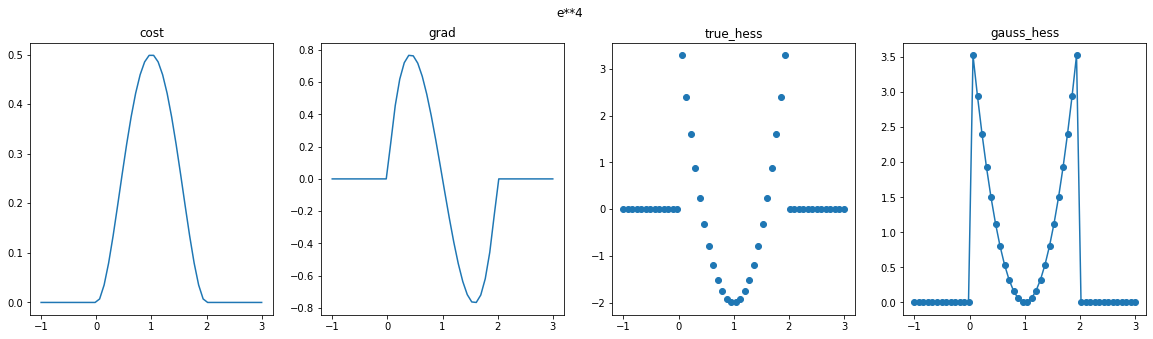

In [72]:
fig, axs = plt.subplots(1, 4, figsize=(10,20))
fig.set_size_inches(20,5)
axs[0].plot(x, cost, label='cost')
axs[0].set_title('cost')
axs[1].plot(x, grad_cost, label='grad')
axs[1].set_title('grad')
axs[2].plot(x, hess_cost, 'o', label='true_hess')
axs[2].set_title('true_hess')
axs[3].plot(x, hess_cost_gauss, '-o', label='gauss_hess')
axs[3].set_title('gauss_hess')
fig.suptitle('e**4')
plt.savefig('e_4.png')
plt.show()

### Gradient descent

### Newton Method

## Absolute distance

In [73]:
e = 1
p_obs = 1

In [74]:
x = np.linspace(-1, 3, 200)
dt = np.abs(x[0]-x[1])

In [78]:
def c(x):
    temp = np.sqrt((x-p_obs)**2)
    r = (e - temp)*(temp < e)
    cost = 0.5*r**2
    return cost, r

In [79]:
cost,_ = c(x)
grad_cost,_ = grad_diff(x)
hess_cost = hess_diff(x)
hess_cost_gauss = hess_diff_gauss(x)


#### Plot cost

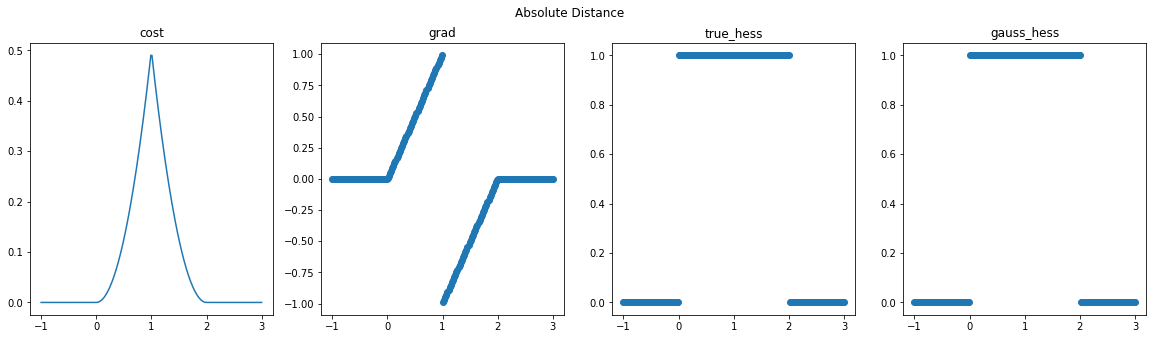

In [81]:
fig, axs = plt.subplots(1, 4, figsize=(10,20))
fig.set_size_inches(20,5)
axs[0].plot(x, cost, label='cost')
axs[0].set_title('cost')
axs[1].plot(x, grad_cost, 'o', label='grad')
axs[1].set_title('grad')
axs[2].plot(x, hess_cost, 'o', label='true_hess')
axs[2].set_title('true_hess')
axs[3].plot(x, hess_cost_gauss, 'o', label='gauss_hess')
axs[3].set_title('gauss_hess')
fig.suptitle('Absolute Distance')
plt.savefig('abs_distance.png')
plt.show()

### Gradient descent

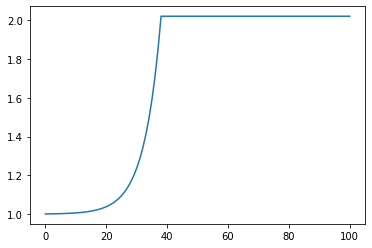

In [72]:
num_iter = 100
x_init = 1.001
x_cur = x_init
step_length = 0.1
xs = [x_cur]
for i in range(num_iter):
    grad_cur = grad(x_cur)
    dx = -step_length*grad_cur
    x_cur = x_cur + dx
    xs.append(x_cur)

plt.plot(xs)

### Newton Method

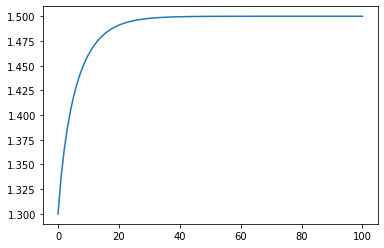

In [166]:
num_iter = 100
x_init = 1.3
x_cur = x_init
step_length = 0.1
xs = [x_cur]
for i in range(num_iter):
    grad_cur = grad(x_cur)
    hess_cur = hess(x_cur)
    dx = -step_length*(1./(hess_cur))*grad_cur
    x_cur = x_cur + dx
    xs.append(x_cur)

plt.plot(xs)

### Activation Function

In [99]:
def c(r):
    d = abs(r-p_obs)
    r0 = e-r
    a = (0.5*(d-e)**2) * (d < e)
    return a, d

In [100]:
cost,_ = c(x)
grad_cost,_ = grad_diff(x)
hess_cost = hess_diff(x)
hess_cost_gauss = hess_diff_gauss(x)


#### Plot cost

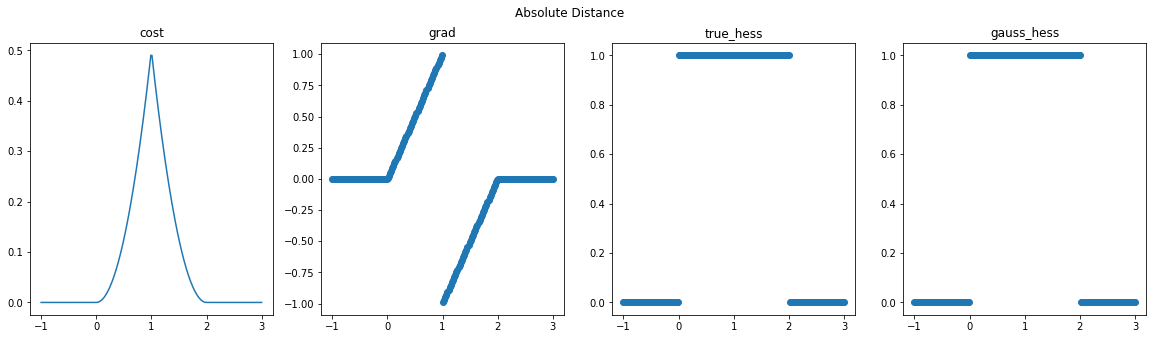

In [101]:
fig, axs = plt.subplots(1, 4, figsize=(10,20))
fig.set_size_inches(20,5)
axs[0].plot(x, cost, label='cost')
axs[0].set_title('cost')
axs[1].plot(x, grad_cost, 'o', label='grad')
axs[1].set_title('grad')
axs[2].plot(x, hess_cost, 'o', label='true_hess')
axs[2].set_title('true_hess')
axs[3].plot(x, hess_cost_gauss, 'o', label='gauss_hess')
axs[3].set_title('gauss_hess')
fig.suptitle('Absolute Distance')
plt.savefig('abs_distance.png')
plt.show()

In [ ]:
(self.d-self.threshold)*r/self.d

In [108]:
def true_hess(x):
    d = abs(x-p_obs)
    return (d - e)/d + e*((x-p_obs)**2)/(d**3)

In [107]:
hess_cost

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
hess_true = true_hess(x)

In [111]:
hess_true

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

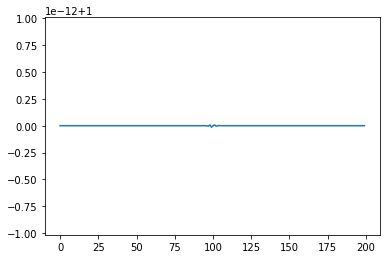

In [110]:
plt.plot(hess_true)

In [30]:
np.concatenate([[0.],[1.],[2.]])

array([0., 1., 2.])

## Examining 2D problem

In [11]:
N = 100
x = np.linspace(-2, 2, 100)
y = np.linspace(-2,2, 100)

In [12]:
X, Y = np.meshgrid(x, y)

In [13]:
data = np.vstack([X.flatten(), Y.flatten()]).T

In [21]:
z = np.zeros(len(data))
for i in range(data.shape[0]):
    z[i] = c(data[i])

In [22]:
Z = z.reshape(N,N)

In [23]:
import pylab

In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
%matplotlib qt

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z)
plt.show()

In [15]:
def c(r):
    d = np.linalg.norm(r)
    if d < e:
        a = 0.5*(d-e)**2
    else:
        a = 0
    return a

In [16]:
def grad(r):
    d = np.linalg.norm(r)
    return ((d-e)*r/d )*(d<e)

In [17]:
def hess(r):
    d = np.linalg.norm(r)
    return np.eye(2)*(d-e)/d + e*np.outer(r,r)/(d**3)

In [18]:
def hess(r):
    d = np.linalg.norm(r)
    return np.outer(r,r)/(d**2)

In [19]:
def grad_diff(r, inc=0.001):
    J = np.zeros(len(r))
    for i in range(len(r)):
        rp = r.copy()
        rp[i]+= inc
        cp = c(rp)
        
        rm = r.copy()
        rm[i]-= inc
        cm = c(rm)
        
        diff = (cp-cm)/(2*inc)
        J[i] = diff
    return J

In [20]:
def hess_diff(r, inc=0.001):
    H = np.zeros((len(r),len(r)))
    for i in range(len(r)):
        rp = r.copy()
        rp[i]+= inc
        gradp = grad(rp)
        
        rm = r.copy()
        rm[i]-= inc
        gradm = grad(rm)
        
        diff = (gradp-gradm)/(2*inc)
        H[i] = diff
    return H

In [313]:
G = []
for i in range(len(data)):
    g = grad_diff(data[i])
    G.append(g)
G = np.vstack(G).reshape(100,100,2)

In [314]:
%matplotlib inline

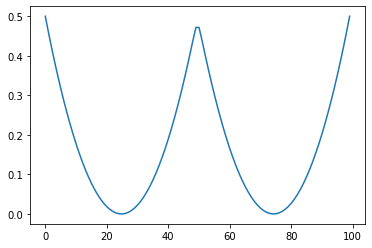

In [315]:
plt.plot(Z[50,:])

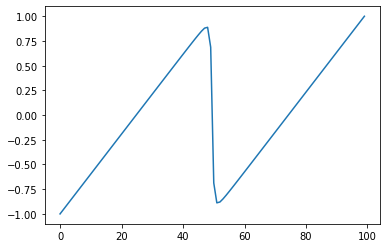

In [316]:
plt.plot(G[50,:,0])

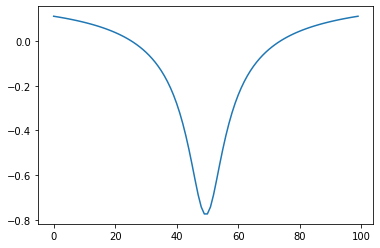

In [317]:
plt.plot(G[55,:,1])

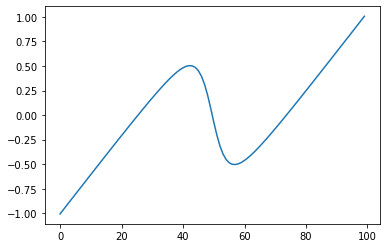

In [318]:
plt.plot(G[55,:,0])

In [319]:
x0 = X[55,40]
y0 = Y[55,40]

In [320]:
r0 = np.array([x0,y0])

In [321]:
grad(r0)

array([ 0.4815879 , -0.27881405])

In [322]:
H = []
for i in range(len(data)):
    h = hess(data[i])
    D = np.linalg.det(h)
    H.append(D)
H = np.array(H).reshape(100,100)

In [27]:
H = []
H_full = []
for i in range(len(data)):
    h = hess_diff(data[i])
    D = np.linalg.det(h)
    H.append(D)
    H_full.append(h)
H = np.array(H).reshape(100,100)

In [28]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,H)
plt.show()

In [197]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z)
plt.show()

In [325]:
%matplotlib qt

In [262]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,G[:,:,1])
plt.show()